In [1]:
from astroquery.sdss import SDSS
from astropy import coordinates as coords
from astropy import units as u
from astropy.table import Table
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import time

gzip was not found on your system! You should solve this issue for astroquery.eso to be at its best!
On POSIX system: make sure gzip is installed and in your path!On Windows: same for 7-zip (http://www.7-zip.org)!


In [14]:
#Get spectra for objects

rar = pd.read_csv('F:/catalogues/final_quasar_catalogue.csv', sep=',', usecols=['RA'],squeeze=True)
decr = pd.read_csv('F:/catalogues/final_quasar_catalogue.csv', sep=',', usecols=['DEC'],squeeze=True)

source_list = [np.array(['source'])]
for row in range(3,len(rar)):
    ra = rar[row]
    dec = decr[row]
    pos = coords.SkyCoord(ra, dec, unit=u.deg)
    xid = SDSS.query_region(pos,obj_names=id,spectro=True)
    sp = SDSS.get_spectra(matches=xid)[0]
    a = sp[1].data['loglam']
    flux = sp[1].data['flux']
    spectrum = np.concatenate(([a],[flux]),axis=0)
    source = [np.array([xid[0]['instrument']])]
    source_list = np.concatenate((source_list,source),axis=0)
    with open('F:/spectra/' + str(row) + 'sp.pickle','wb') as wfile:
        pickle.dump(spectrum,wfile)
    print(row)

'''fig, ax = plt.subplots(figsize=(14.,8.5))
for i in np.arange(xid['ra'].size):
    ax.plot(10.**sp[i][1].data['loglam'],sp[i][1].data['flux'],label=xid['instrument'][i])
ax.set_ylabel('Flux [10$^{-17}$ ergs/cm$^2$/s/\AA]')
ax.set_xlabel('Wavelength [\AA]')
ax.legend(loc='upper right')'''

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160


KeyboardInterrupt: 

(0, 1.1410271165900534)

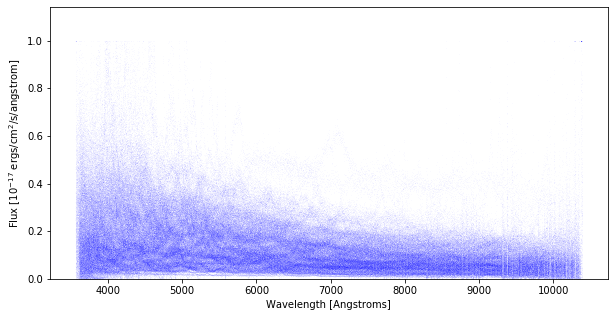

In [22]:
import os

fig = plt.figure(figsize=(10,5))
ax = plt.subplot()
for file in os.listdir('F:/spectra/'):
    file = 'F:/spectra/{}'.format(file)
    with open(file,'rb') as rfile:
        sp = pickle.load(rfile)
    ax.scatter(10.**sp[0],sp[1]/np.max(sp[1]),c='blue',s=0.00005)#,label=xid['objid'])
ax.set_ylabel('Flux [10$^{-17}$ ergs/cm$^2$/s/angstrom]')
ax.set_xlabel('Wavelength [Angstroms]')
ax.set_ylim(0)
#ax.legend(loc='upper right')